# Importing Important Libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Reading and understanding the Data

In [2]:
data = pd.read_csv(r"C:\Falguni\Upgrad\Documents+Files\ML\Logistic Final Case Study\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# making copy of original data
data_copy = data

### Checking the sturcture of data

In [4]:
print("*********************************  Info *******************************************") 
print(data.info())
print("*********************************  Shape ******************************************") 
print(data.shape)
print("********************************* Data Types **************************************")
print(data.dtypes)
print("********************************* Columns ******************************************")
print(data.columns)
print("********************************* Describe ****************************************")
data.describe()

*********************************  Info *******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                 

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Cleaning

### Converting 'Select' values to NaN

For many categorical variables, default value is set as NaN where the user has not given any input.

Imputing all the "Select" value as missing for further analysis

In [5]:
data = data.replace('Select', np.nan)
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Dropping the columns generated after the lead call

Dropping all the columns which were created by the sales team categorising the lead post discussion

The Columns are:
 - Tags
 - Lead Quality
 - Lead Profile
 - Asymmetrique Activity Index
 - Asymmetrique Activity Score
 - Asymmetrique Profile Index
 - Asymmetrique Profile Score

In [6]:
# Dropping the columns which were generated after the cold calling
post_call = ['Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score']
data = data.drop(post_call, 1)
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [7]:
# Removing Prostect ID as we already have unique Lead Number for each row
data = data.drop(['Prospect ID'],1)

### Checking for missing values in the dataset:

In [8]:
# Function to check missing values
def isnull_percentage_func(x):
    return round(100*(data.isnull().sum()/len(data.index)),2)

In [9]:
finding_null = pd.DataFrame({'Name':data.columns,'percentage_of_Null_Values':isnull_percentage_func(data)})
finding_null.set_index("Name").sort_values(by= 'percentage_of_Null_Values',ascending=False)

,percentage_of_Null_Values
Name,
How did you hear about X Education,78.46
City,39.71
Specialization,36.58
What matters most to you in choosing a course,29.32
What is your current occupation,29.11
Country,26.63
Page Views Per Visit,1.48
TotalVisits,1.48
Last Activity,1.11


#### Inferences : 
 - "How did you hear about X Education" has 78% missing values, Removing the column for further analysis
 - Below mentioned columns have missing values ranging between 25-40%. After further analysis, we'll decide either to drop the columns or impute the values
   - City
   - Specialization
   - What matters most to you in choosing a course
   - What is your current occupation
   - Country
 - For four variables, missing values are below 1.5%

In [10]:
# Dropping "How did you hear about X Education" because of high NAN values
data = data.drop(["How did you hear about X Education"],1)
data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


### Checking for Unique categories in Categorical variables

Here, we'll check for the skewness in each of the categorical column. The output obtained is in the form of percentage of that particular unique category.

If majority of the rows belong to a single category, the data would be highly skewed and will impact the analysis.

In [11]:
# Checking Skewness of Categorical Variables
Cat_variables = ['Lead Origin','Lead Source','City','Specialization','Last Activity','Country','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity']

for column in Cat_variables:
    print(data[column].value_counts()/len(data)*100)
    print("*********************************************************************************************")

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
*********************************************************************************************
Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Social Media          0.021645
Live Chat             0.021645
Press_Release         0.021645
youtubechannel        0.010823
Pay per Click Ads     0.010823
blog                  0.010823
testone               0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64
**

### Checking for Unique categories in Binary variables

Here, we'll check for the skewness in each of the binary column. The output obtained is in the form of percentage of yes or no for that particular variable.

If all the rows belong to either yes or no, the data would be highly skewed and will impact the analysis.

In [12]:
# Checking Skewness of Binary Variables
Bin_variables = ['Do Not Call','Do Not Email','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Through Recommendations']

for c in Bin_variables:
    print(data[c].value_counts()/len(data)*100)
    print("*************************************************************")

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64
*************************************************************
No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64
*************************************************************
No     99.848485
Yes     0.151515
Name: Search, dtype: float64
*************************************************************
No    100.0
Name: Magazine, dtype: float64
*************************************************************
No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64
*************************************************************
No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64
*************************************************************
No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64
*************************************************************
No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64
********************************

#### Inferences for Highly Skewed Variables:

- Categorical Variables:
 1. Country : 70% of the rows belong "India" and 29% values are missing. Rest of the countries have value less than 0.8%. Dropping the variable.
 2. What matters most to you in choosing a course : 70% of the rows belong to "Better Career Prospects" and approx. 29% of values are missing accounting for 99% of data. Dropping the variable.
 3. What is your current occupation : 60% of rows belong to "Unemployed" and 29% of the data is missing. As per business need, keeping the variable
 


- Binary Variables:
    
    Below mentioned binary variables have 100% or approx 100% of the data belonging to one category i.e. "NO" making the varibale higly skewed. Dropping the below mentioned variables for better anlysis.
  -  Magazine
  - I agree to pay the amount through cheque
  - Get updates on DM Content
  - Receive More Updates About Our Courses
  - Update me on Supply Chain Content
  - Do Not Call
  - Search
  - Newspaper Article
  - X Education Forum
  - Newspaper
  - Through Recommendations
  - Digital Advertisement

In [13]:
# Dropping categorical variables having high skewness
data = data.drop(['Country','What matters most to you in choosing a course'],1)

# Dropping Binary variables having high skewness as all the entires are of a single type i.e. NO
data = data.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Through Recommendations'],1)
data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,NaN,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,NaN,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Mumbai,No,Modified


### Combining the Categories

For the Categorical Variables, categories having very less data as compared to other categories, Combing all of them under the "Others" Category for better analysis

In [14]:
# Capping of variables to others
Capped_variables = ['Lead Origin','Lead Source','Last Activity','Last Notable Activity','City','Specialization','What is your current occupation']
for a in Capped_variables:
    frequencies = data[a].value_counts(normalize = True)
    small_categories = frequencies[frequencies < 0.1].index
    data[a] = data[a].replace(small_categories, "Others")
    print(data[a].value_counts()/len(data)*100)
    print("*************************************************")

Landing Page Submission    52.878788
API                        38.744589
Others                      8.376623
Name: Lead Origin, dtype: float64
*************************************************
Google            31.038961
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Others             9.567100
Name: Lead Source, dtype: float64
*************************************************
Email Opened               37.196970
SMS Sent                   29.707792
Others                     21.450216
Olark Chat Conversation    10.530303
Name: Last Activity, dtype: float64
*************************************************
Modified        36.872294
Email Opened    30.595238
SMS Sent        23.506494
Others           9.025974
Name: Last Notable Activity, dtype: float64
*************************************************
Mumbai               34.870130
Others                9.859307
Thane & Outskirts     8.138528
Other Cities          7.424242
Name: City, dtype: float6

In [15]:
data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Others,NaN,Unemployed,NaN,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,NaN,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Others,Others,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Others,Unemployed,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Others,NaN,Unemployed,Mumbai,No,Modified


### Checking for missing values and imputing them

In [16]:
finding_null = pd.DataFrame({'Name':data.columns,'percentage_of_Null_Values':isnull_percentage_func(data)})
finding_null.set_index("Name").sort_values(by= 'percentage_of_Null_Values',ascending=False)

,percentage_of_Null_Values
Name,
City,39.71
Specialization,36.58
What is your current occupation,29.11
TotalVisits,1.48
Page Views Per Visit,1.48
Last Activity,1.11
Lead Source,0.39
Lead Number,0.00
Lead Origin,0.00


#### Inferences : 
- "City" variable has 39% missing values. Since, this could be an important parameter as per the business understanding, Imputing the missing value with mode i.e. "Mumbai"
- "Specialization" has 36% missing values. Imputing the data with mode i.e "Umeployed" might impact the dataset, hence, imputing the missing values as "Not_Specified"
- "What is your current occupation" has 29% missing values. Under occupation,imputing the data with mode might not give accurate results as per business need, Imputing the missing data as "Not_Specified"

In [17]:
# Replacing the missing values is "City" as "Mumbai"
data['City'] = data['City'].replace(np.nan, 'Mumbai')

# Replacing the missing values is "Specialization"" as "Not_Specified"
data['Specialization'] = data['Specialization'].replace(np.nan, 'Not_Specified')

# Replacing the missing values is "What is your current occupationy" as "Not_Specified"
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Not_Specified')

In [18]:
# Rest missing values are under 1.5% so we can drop these rows.
data.dropna(inplace = True)

### Checking for missing values the dataset

In [19]:
finding_null = pd.DataFrame({'Name':data.columns,'percentage_of_Null_Values':isnull_percentage_func(data)})
finding_null.set_index("Name").sort_values(by= 'percentage_of_Null_Values',ascending=False)

,percentage_of_Null_Values
Name,
Lead Number,0.0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Converted,0.0
TotalVisits,0.0
Total Time Spent on Website,0.0
Page Views Per Visit,0.0
Last Activity,0.0


### Checking for data in missing rows

In [20]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

Our dataset is ready for further analysis as there are no missing values in the dataset

### Calculating the number of rows retained after cleaning the dataset

In [21]:
print("Original Data {} % Retained".format(round((len(data)*100/len(data_copy)))))

Original Data 98 % Retained


###### 98% of the rows are retained after cleaning the dataset.

Before starting the EDA, let's check the current percentage of leads that are successfully getting converted.

In [22]:
Converted =(sum(data['Converted'])/len(data['Converted'].index))*100
Converted

37.85541106458012

Currently, approx. 38% of the lead is getting converted

# Exploratory Data Analysis

### Categorical Data Variables

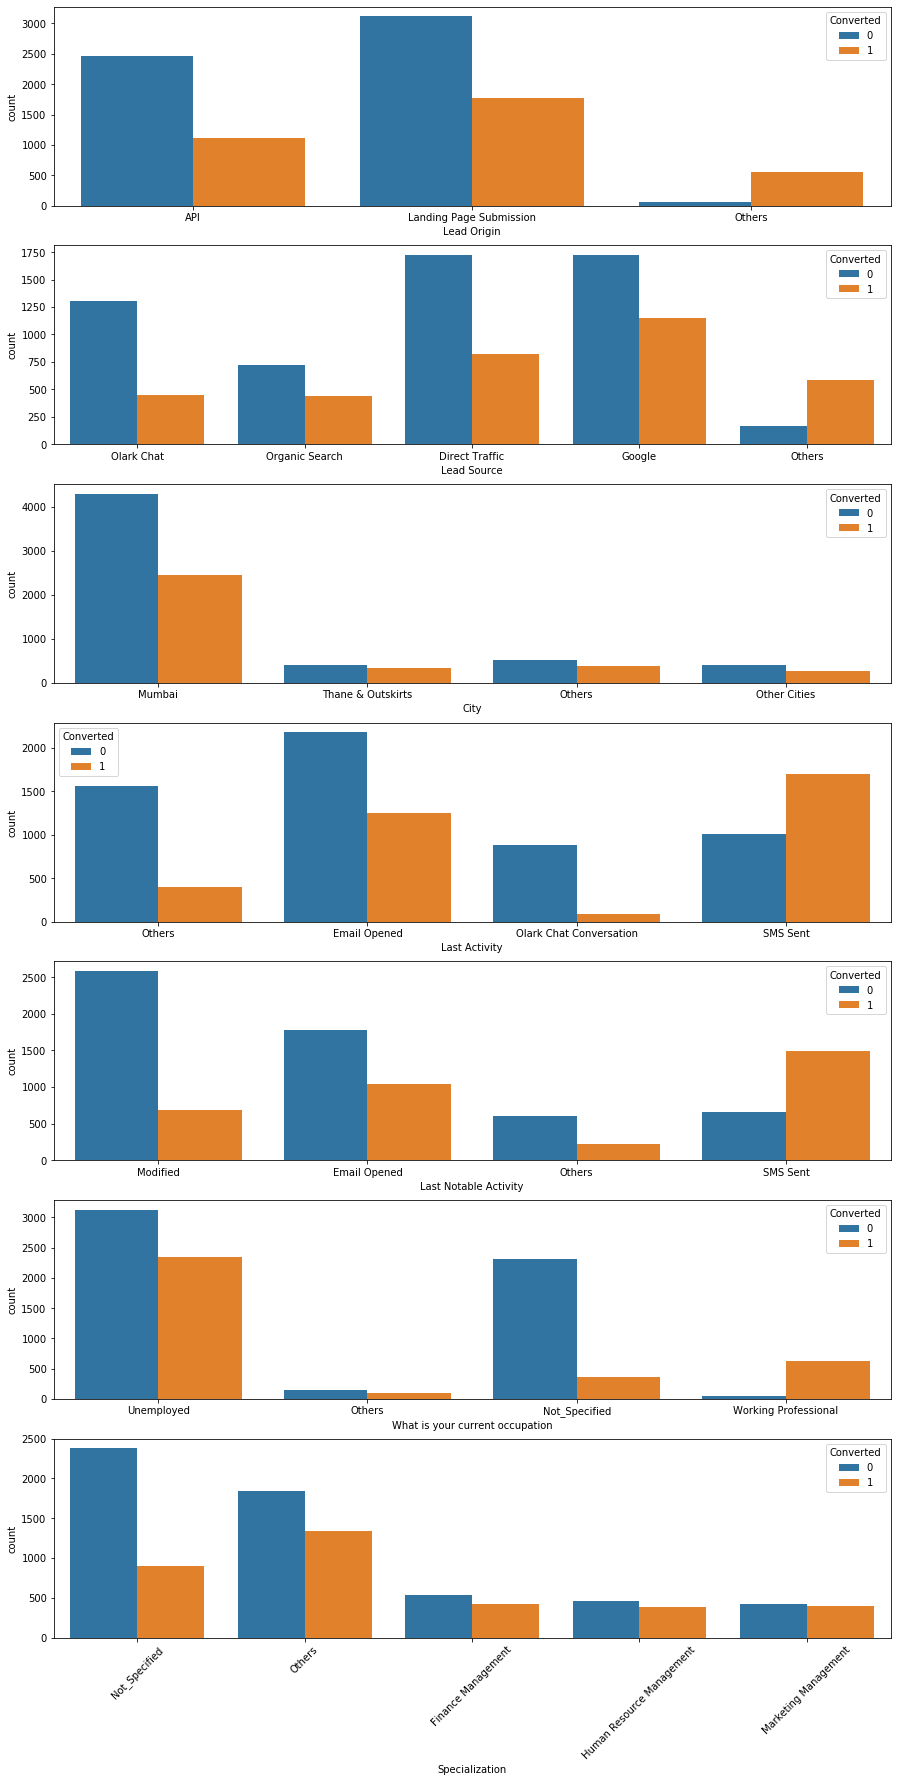

In [23]:
# Countplot for the variables

plt.figure(figsize=(15,30))

# Lead Origin
plt.subplot(7,1,1)
sns.countplot(x = "Lead Origin", hue = "Converted", data = data)

#Lead Source
plt.subplot(7,1,2)
sns.countplot(x = "Lead Source", hue = "Converted", data = data)

#City
plt.subplot(7,1,3)
sns.countplot(x = "City", hue = "Converted", data = data)

#Last Activity
plt.subplot(7,1,4)
sns.countplot(x = "Last Activity", hue = "Converted", data = data)

#Last Notable Activity
plt.subplot(7,1,5)
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = data)

#What is your current occupation
plt.subplot(7,1,6)
sns.countplot(x = "What is your current occupation", hue = "Converted", data = data)

#Specialization
plt.subplot(7,1,7)
sns.countplot(x = "Specialization", hue = "Converted", data = data)
plt.xticks(rotation=45)

plt.show()

#### Inferences : 
1. Lead Origin:
 - API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
 - Lead Add Form has more than 90% conversion rate but count of lead are not very high.
 - Lead Import are very less in count.


2. Lead Source:
 - Google and Direct traffic generates maximum number of leads.
 - Conversion Rate of "Others" is high.


3. City:
 - Most leads are from Mumbai with around 30% conversion rate.
 

4. Last Activity:
 - Most of the lead have their Email opened as their last activity.
 - Conversion rate for leads with last activity as SMS Sent is almost(approx. 1700)that is 60%.


5. Last Notable Activity:
 - Count for Modified is the highest.
 - Conversion Rate for SMS sent is high.


6. What is your Current Occupation
 - Count of unemployed leads is high with more than 70% conversion rate.
 - Working professionals have great conversion  rate.
 
 
7. Specialization:
 - None of the specialization has a major impact
 - The highest count are for Others(rest of the categories under Specialization which had very less count) and Not-    specified.

### Binary Data Variables

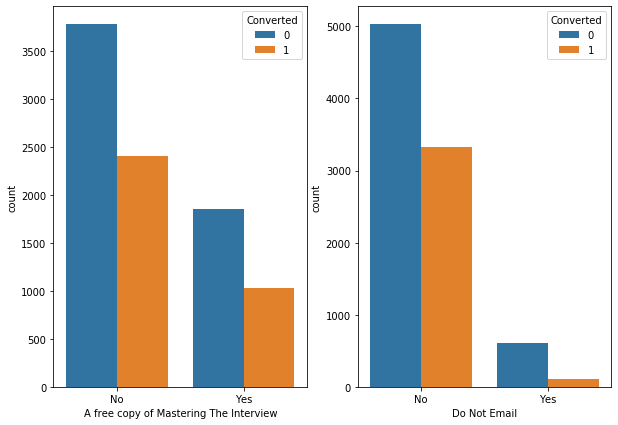

In [24]:
# Countplot for the variables

plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = data)
plt.subplot(1,2,2)
sns.countplot(x = "Do Not Email", hue = "Converted", data = data)
plt.show()

#### Inferences:
 - A free copy attracts few customers.
 - Customers do not prefer to be called or emailed.
 - Very few customers look forward to an email followup.

### Numerical Variables

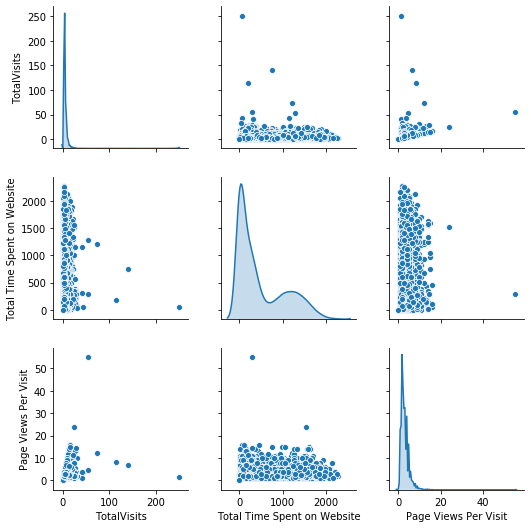

In [25]:
# ScatterPlot for continuous variables
num_data = data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
sns.pairplot(num_data, diag_kind='kde')
plt.show()

#### Inferences:
 - Total Visits and Page Views Per Visit are lineraly related
 - Total Time Spent on website and Page Views per visit are related but clustered

### Outlier Analysis and Treament

In [26]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


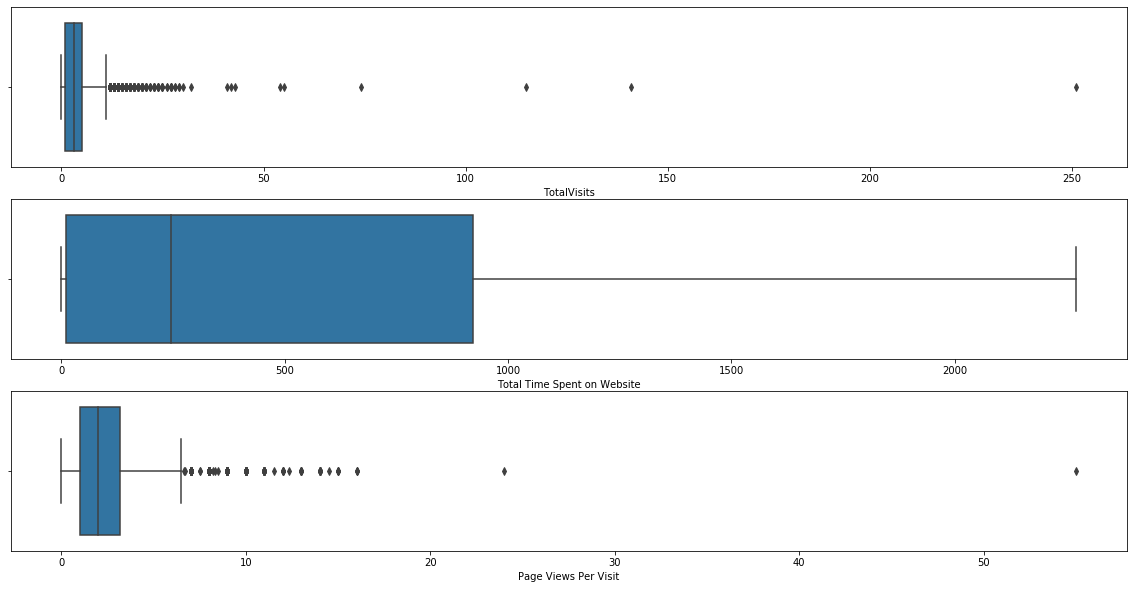

In [27]:
# Plotting the box plot for numerical variables to analyse the outliers
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
sns.boxplot(data['TotalVisits']);
plt.subplot(3,1,2)
sns.boxplot(data['Total Time Spent on Website']);
plt.subplot(3,1,3)
sns.boxplot(data['Page Views Per Visit']);

#### Inferences:
 - Total Visits have alot of outliers at upper end
 - There are no outliers in Total Time Spent on Website
 - Page Views per Visit has outliers in the upper end

In [28]:
# Performing Mid-range capping for the outliers
percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

### Boxplot for numerical variables:

Creating boxplot for the mentioned numberical variable w.r.t conversion rate

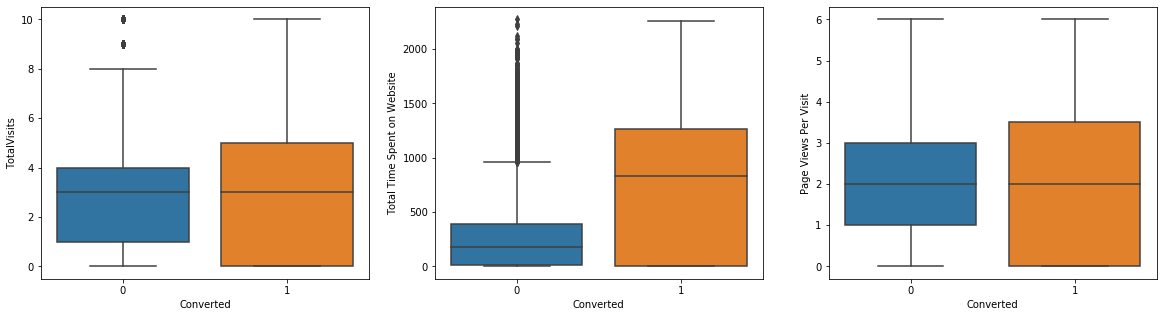

In [29]:
plt.figure(figsize = (20,5))

#Total Visits
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)

#Total Time Spent on Website
plt.subplot(1,3,2)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)

#Page Views Per Visit 
plt.subplot(1,3,3)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data)

plt.show()

#### Inferences: 

1. Total Visits:
 - Median for converted and not converted leads are the same. Nothng conclusive can be said on the basis of plot.
 
 
2. Total Time Spent on Website:
 - Leads spend more time on the websites are more likely to be converted.Website should be made more attractive and engaging to make leads spend more time.


3. Page Views Per Visit:
 - Median for converted and not converted leads is the same, not indicating anything conclusive on the basis of plot.

### Correlation Matrix

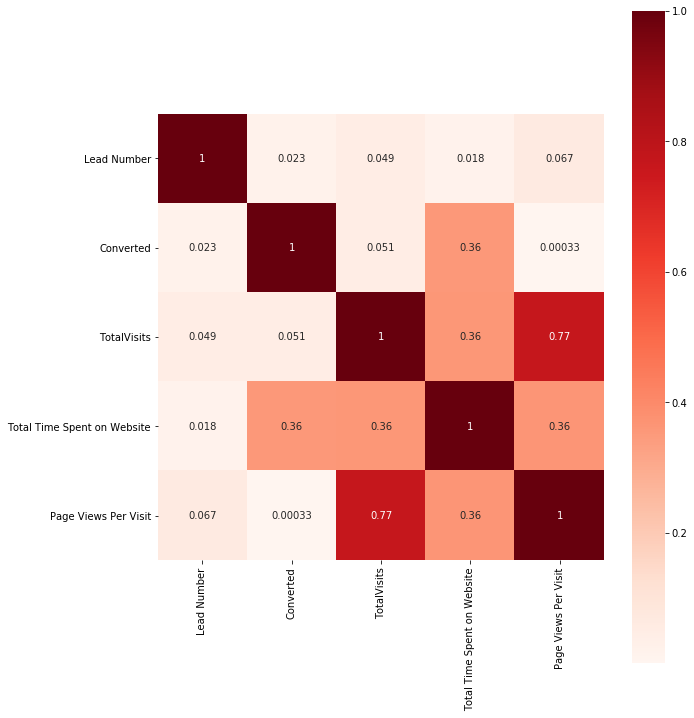

In [30]:
#Calculating the correlation for the numerical variables
plt.figure(figsize = (10,12))  
ax = sns.heatmap(data.corr(),square = True,annot=True, cmap="Reds")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

#### Inferences:
 - A significant correlation (0.36) with converted can be seen with Total time visit on the Website.
 - A weak correlation(0.00033) is seen between converted and Page views per Visit

# Data Preparation

### Converting Binary variables (yes/no) to 1/0

In [31]:
varlist= ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)
data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Others,Not_Specified,Unemployed,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not_Specified,Unemployed,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Others,Others,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Others,Unemployed,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,Not_Specified,Unemployed,Mumbai,0,Modified


### Creating a dummy variable for some of the categorical variables and dropping the first one.

In [32]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['Lead Origin', 'Specialization','Lead Source','Last Activity','Last Notable Activity','What is your current occupation','City']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Others,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Not_Specified,Specialization_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Others,City_Thane & Outskirts
0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0


In [33]:
# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)
data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Others,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Not_Specified,Specialization_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Others,City_Thane & Outskirts
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Others,Not_Specified,Unemployed,Mumbai,0,Modified,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not_Specified,Unemployed,Mumbai,0,Email Opened,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Others,Others,Mumbai,1,Email Opened,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Others,Unemployed,Mumbai,0,Modified,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,Not_Specified,Unemployed,Mumbai,0,Modified,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0


In [34]:
# Dropping the Original Columns since dummy are created for the same
data = data.drop(['Lead Origin', 'Specialization','Lead Source','Last Activity','City','Last Notable Activity','What is your current occupation'], axis = 1)
data.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Not_Specified,Specialization_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Others,City_Thane & Outskirts
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0


### Test-Train split

In [35]:
# Importing the Library
from sklearn.model_selection import train_test_split

In [36]:
# Putting feature variable to X
X = data.drop(['Converted','Lead Number'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Not_Specified,Specialization_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Others,City_Thane & Outskirts
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0


In [37]:
# Putting response variable to y
y = data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [38]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=69)

In [39]:
# Checking the shape of test and train data
print(y_test.shape)
print(X_train.shape)

(2723,)
(6351, 27)


### Feature Scaling

In [40]:
# Importing the library
from sklearn.preprocessing import StandardScaler

In [41]:
#All the columns of the X_train dataframe
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management', 'Specialization_Not_Specified',
       'Specialization_Others', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent',
       'What is your current occupation_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Others', 'City_Thane & Outskirts'],
      dtype='object')

In [42]:
# Standardizing the numerical variables
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Not_Specified,Specialization_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Others,City_Thane & Outskirts
4575,0,-0.435374,1.744876,-0.150861,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
5919,0,-0.072886,-0.676792,0.411741,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8039,0,-1.160350,-0.891970,-1.276066,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2361,0,-1.160350,-0.891970,-1.276066,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
8241,0,-0.072886,-0.561909,0.411741,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0


Before starting the modeling, checking for highly correlated variables as they might impact the analysis

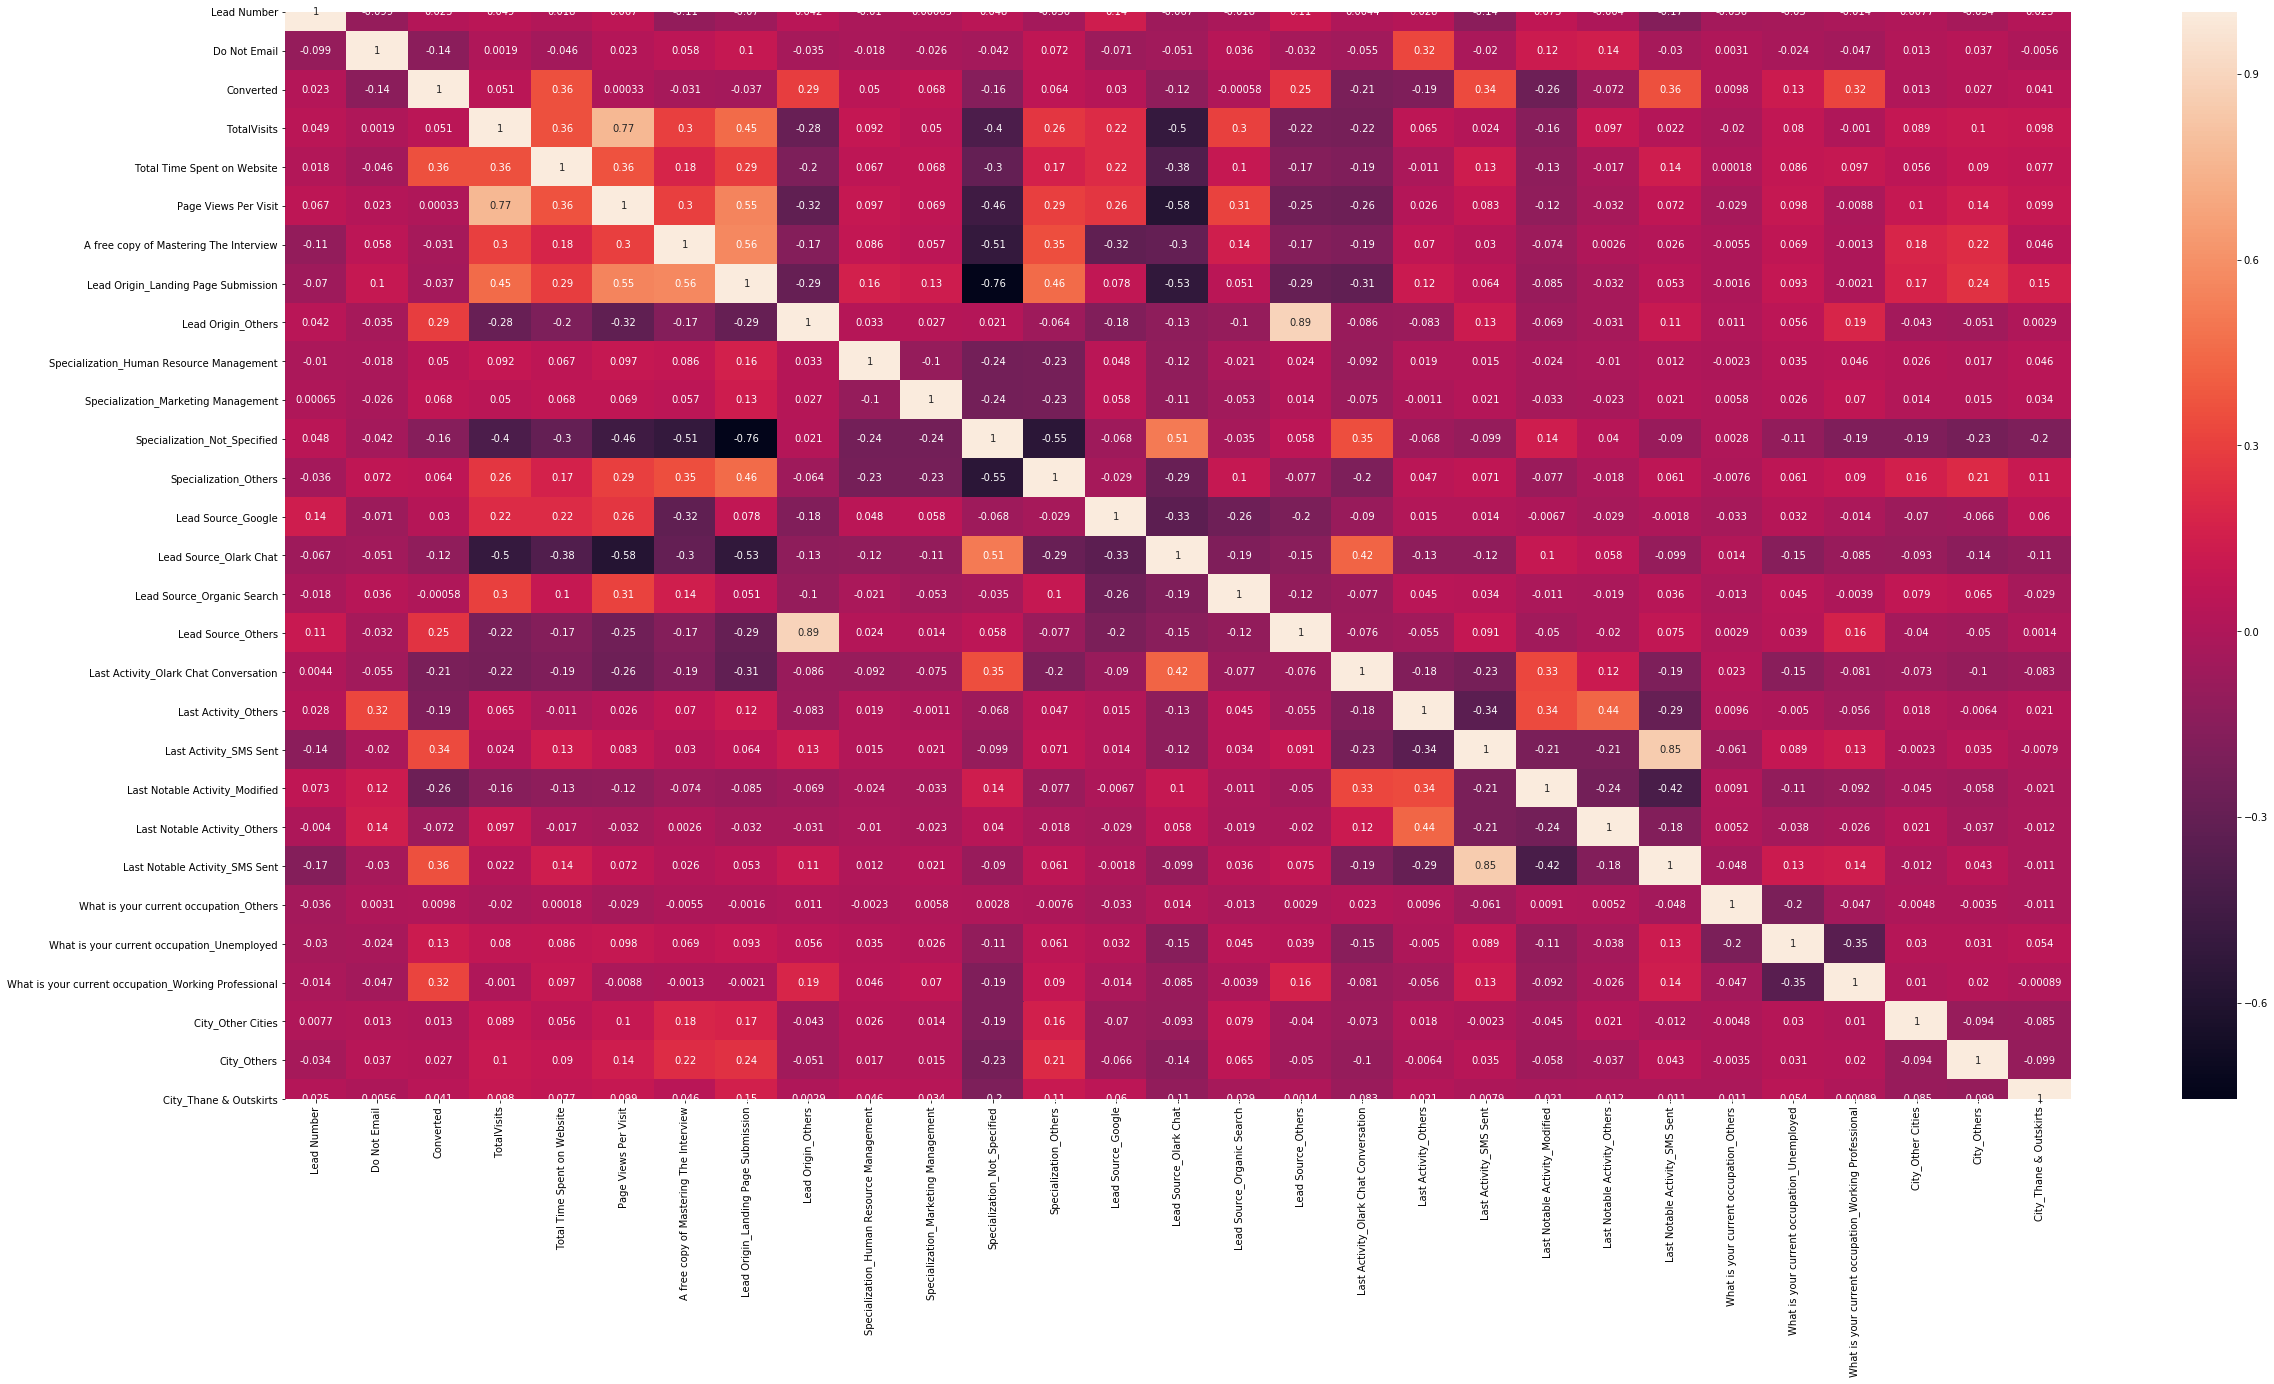

In [43]:
# correlation
plt.figure(figsize = (40,20))   # Size of the figure
sns.heatmap(data.corr(),annot = True)
plt.show()

In [44]:
# Based on above plot, Dropping the highly correlated columns from both test and train data sets
X_test = X_test.drop(['Last Notable Activity_SMS Sent','Last Activity_SMS Sent','Lead Source_Others','Lead Origin_Others'], 1)
X_train = X_train.drop(['Last Notable Activity_SMS Sent','Last Activity_SMS Sent','Lead Source_Others','Lead Origin_Others'], 1)

# Model Building

In [45]:
# Importing library
import statsmodels.api as sm

### Model - 1
Creating the first model using all the available features

In [46]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2815.1
Date:                Mon, 07 Sep 2020   Deviance:                       5630.1
Time:                        17:54:14   Pearson chi2:                 6.41e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4469      0.177      2.531      0.011       0.101       0.793
Do Not Email                                            -0.8653      0.164     -5.277      0.000      -1.187      -0.544
TotalVisits                                              0.1933      0.052      3.706      0.000       0.091       0.296
Total Time Spent on Website                              0.9578      0.039     24.797      0.000       0.882       1.034
Page Views Per Visit                                    -0.4658      0.058     -7.970      0.000      -0.580      -0.351
A free copy of Mastering The Interview                  -0.6267      0.101     -6.207      0.000      -0.825      -0.429
Lead Origin_Landing Page Submission                     -1.4073      0.123    -11.485      0.000      -1.647      -1.167
Specialization_Human Resource Management                -0.0155      0.146     -0.106      0.916      -0.303       0.272
Specialization_Marketing Management                     -0.0954      0.147     -0.649      0.517      -0.384       0.193
Specialization_Not_Specified                            -1.2080      0.149     -8.092      0.000      -1.501      -0.915
Specialization_Others                                   -0.0472      0.115     -0.410      0.682      -0.273       0.178
Lead Source_Google                                      -0.4748      0.097     -4.875      0.000      -0.666      -0.284
Lead Source_Olark Chat                                  -0.3101      0.121     -2.572      0.010      -0.546      -0.074
Lead Source_Organic Search                              -0.1236      0.118     -1.051      0.293      -0.354       0.107
Last Activity_Olark Chat Conversation                   -1.8217      0.187     -9.736      0.000      -2.188      -1.455
Last Activity_Others                                    -1.1428      0.138     -8.259      0.000      -1.414      -0.872
Last Notable Activity_Modified                          -0.5096      0.099     -5.149      0.000      -0.704      -0.316
Last Notable Activity_Others                             0.3730      0.181      2.065      0.039       0.019       0.727
What is your current occupation_Others                   1.3641      0.204      6.686      0.000       0.964       1.764
What is your current occupation_Unemployed               1.3379      0.085     15.668      0.000       1.171       1.505
What is your current occupation_Working Professional     3.7250      0.192     19.356      0.000       3.348       4.102
City_Other Cities                                        0.0477      0.130      0.366      0.714      -0.208       0.303
City_Others                                             -0

Using RFE, selecting the 20 optimum features

In [47]:
# Feature selection using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [48]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True])

In [49]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Specialization_Human Resource Management', False, 4),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Not_Specified', True, 1),
 ('Specialization_Others', False, 2),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Others', True, 1),
 ('What is your current occupation_Others', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', True, 1),
 ('City_Others', False, 3),
 ('City_Thane & Outskirts', True, 1)]

In [50]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission',
       'Specialization_Marketing Management', 'Specialization_Not_Specified',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Notable Activity_Modified',
       'Last Notable Activity_Others',
       'What is your current occupation_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Thane & Outskirts'],
      dtype='object')

In [51]:
X_train.columns[~rfe.support_]

Index(['Specialization_Human Resource Management', 'Specialization_Others',
       'City_Others'],
      dtype='object')

### Model - 2
Creating Model Based on features selected from RFE and assessing using stats model

In [52]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2815.2
Date:                Mon, 07 Sep 2020   Deviance:                       5630.3
Time:                        17:54:14   Pearson chi2:                 6.42e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4133      0.152      2.718      0.007       0.115       0.711
Do Not Email                                            -0.8670      0.164     -5.290      0.000      -1.188      -0.546
TotalVisits                                              0.1933      0.052      3.709      0.000       0.091       0.295
Total Time Spent on Website                              0.9577      0.039     24.800      0.000       0.882       1.033
Page Views Per Visit                                    -0.4664      0.058     -7.985      0.000      -0.581      -0.352
A free copy of Mastering The Interview                  -0.6286      0.101     -6.247      0.000      -0.826      -0.431
Lead Origin_Landing Page Submission                     -1.4080      0.122    -11.505      0.000      -1.648      -1.168
Specialization_Marketing Management                     -0.0629      0.117     -0.537      0.591      -0.292       0.167
Specialization_Not_Specified                            -1.1748      0.120     -9.829      0.000      -1.409      -0.941
Lead Source_Google                                      -0.4731      0.097     -4.866      0.000      -0.664      -0.283
Lead Source_Olark Chat                                  -0.3104      0.121     -2.576      0.010      -0.547      -0.074
Lead Source_Organic Search                              -0.1264      0.118     -1.076      0.282      -0.357       0.104
Last Activity_Olark Chat Conversation                   -1.8217      0.187     -9.742      0.000      -2.188      -1.455
Last Activity_Others                                    -1.1429      0.138     -8.261      0.000      -1.414      -0.872
Last Notable Activity_Modified                          -0.5095      0.099     -5.150      0.000      -0.703      -0.316
Last Notable Activity_Others                             0.3743      0.181      2.073      0.038       0.020       0.728
What is your current occupation_Others                   1.3661      0.204      6.701      0.000       0.967       1.766
What is your current occupation_Unemployed               1.3375      0.085     15.667      0.000       1.170       1.505
What is your current occupation_Working Professional     3.7242      0.192     19.354      0.000       3.347       4.101
City_Other Cities                                        0.0486      0.128      0.381      0.703      -0.201       0.299
City_Thane & Outskirts                                   0.0443      0.121      0.367      0.714      -0.193       0.281
========================================================================================================================
"""

#### Checking for VIF

In [53]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Landing Page Submission,4.49
13,Last Notable Activity_Modified,3.37
12,Last Activity_Others,3.22
3,Page Views Per Visit,3.16
7,Specialization_Not_Specified,2.79
4,A free copy of Mastering The Interview,2.73
1,TotalVisits,2.66
16,What is your current occupation_Unemployed,2.45
9,Lead Source_Olark Chat,2.39
14,Last Notable Activity_Others,2.33


### Model - 3 :

Since the VIF is under 5 for all the variables, dropping features on the basis of p-value

Firstly, dropping "City_Thane & Outskirts" having p-value of 0.714

In [54]:
col = col.drop(['City_Thane & Outskirts'],1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission',
       'Specialization_Marketing Management', 'Specialization_Not_Specified',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Notable Activity_Modified',
       'Last Notable Activity_Others',
       'What is your current occupation_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities'],
      dtype='object')

In [55]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2815.2
Date:                Mon, 07 Sep 2020   Deviance:                       5630.5
Time:                        17:54:15   Pearson chi2:                 6.42e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4204      0.151      2.787      0.005       0.125       0.716
Do Not Email                                            -0.8678      0.164     -5.294      0.000      -1.189      -0.547
TotalVisits                                              0.1941      0.052      3.727      0.000       0.092       0.296
Total Time Spent on Website                              0.9577      0.039     24.800      0.000       0.882       1.033
Page Views Per Visit                                    -0.4670      0.058     -7.998      0.000      -0.581      -0.353
A free copy of Mastering The Interview                  -0.6309      0.100     -6.282      0.000      -0.828      -0.434
Lead Origin_Landing Page Submission                     -1.4071      0.122    -11.501      0.000      -1.647      -1.167
Specialization_Marketing Management                     -0.0639      0.117     -0.546      0.585      -0.293       0.166
Specialization_Not_Specified                            -1.1808      0.118     -9.972      0.000      -1.413      -0.949
Lead Source_Google                                      -0.4733      0.097     -4.869      0.000      -0.664      -0.283
Lead Source_Olark Chat                                  -0.3111      0.121     -2.581      0.010      -0.547      -0.075
Lead Source_Organic Search                              -0.1277      0.117     -1.087      0.277      -0.358       0.103
Last Activity_Olark Chat Conversation                   -1.8220      0.187     -9.745      0.000      -2.188      -1.456
Last Activity_Others                                    -1.1427      0.138     -8.259      0.000      -1.414      -0.872
Last Notable Activity_Modified                          -0.5094      0.099     -5.148      0.000      -0.703      -0.315
Last Notable Activity_Others                             0.3740      0.181      2.071      0.038       0.020       0.728
What is your current occupation_Others                   1.3654      0.204      6.697      0.000       0.966       1.765
What is your current occupation_Unemployed               1.3376      0.085     15.668      0.000       1.170       1.505
What is your current occupation_Working Professional     3.7232      0.192     19.350      0.000       3.346       4.100
City_Other Cities                                        0.0429      0.127      0.339      0.735      -0.205       0.291
========================================================================================================================
"""

In [56]:
# Calculating the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Landing Page Submission,4.42
13,Last Notable Activity_Modified,3.36
12,Last Activity_Others,3.22
3,Page Views Per Visit,3.16
7,Specialization_Not_Specified,2.77
4,A free copy of Mastering The Interview,2.73
1,TotalVisits,2.65
16,What is your current occupation_Unemployed,2.44
9,Lead Source_Olark Chat,2.38
14,Last Notable Activity_Others,2.33


Dropping "City_Other Cities" as it is having high p-value of 0.735 and VIFs is not greater than 5.

In [57]:
col = col.drop(['City_Other Cities'],1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission',
       'Specialization_Marketing Management', 'Specialization_Not_Specified',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Notable Activity_Modified',
       'Last Notable Activity_Others',
       'What is your current occupation_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Model -4

In [58]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2815.3
Date:                Mon, 07 Sep 2020   Deviance:                       5630.6
Time:                        17:54:15   Pearson chi2:                 6.42e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4243      0.150      2.821      0.005       0.130       0.719
Do Not Email                                            -0.8686      0.164     -5.300      0.000      -1.190      -0.547
TotalVisits                                              0.1936      0.052      3.718      0.000       0.092       0.296
Total Time Spent on Website                              0.9579      0.039     24.804      0.000       0.882       1.034
Page Views Per Visit                                    -0.4668      0.058     -7.995      0.000      -0.581      -0.352
A free copy of Mastering The Interview                  -0.6289      0.100     -6.273      0.000      -0.825      -0.432
Lead Origin_Landing Page Submission                     -1.4068      0.122    -11.496      0.000      -1.647      -1.167
Specialization_Marketing Management                     -0.0639      0.117     -0.546      0.585      -0.293       0.165
Specialization_Not_Specified                            -1.1844      0.118    -10.042      0.000      -1.416      -0.953
Lead Source_Google                                      -0.4747      0.097     -4.887      0.000      -0.665      -0.284
Lead Source_Olark Chat                                  -0.3106      0.121     -2.578      0.010      -0.547      -0.074
Lead Source_Organic Search                              -0.1267      0.117     -1.079      0.281      -0.357       0.103
Last Activity_Olark Chat Conversation                   -1.8221      0.187     -9.746      0.000      -2.189      -1.456
Last Activity_Others                                    -1.1422      0.138     -8.256      0.000      -1.413      -0.871
Last Notable Activity_Modified                          -0.5100      0.099     -5.155      0.000      -0.704      -0.316
Last Notable Activity_Others                             0.3749      0.181      2.077      0.038       0.021       0.729
What is your current occupation_Others                   1.3637      0.204      6.690      0.000       0.964       1.763
What is your current occupation_Unemployed               1.3377      0.085     15.669      0.000       1.170       1.505
What is your current occupation_Working Professional     3.7232      0.192     19.349      0.000       3.346       4.100
========================================================================================================================
"""

In [59]:
# Calculating the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Landing Page Submission,4.39
13,Last Notable Activity_Modified,3.36
12,Last Activity_Others,3.22
3,Page Views Per Visit,3.16
7,Specialization_Not_Specified,2.77
4,A free copy of Mastering The Interview,2.71
1,TotalVisits,2.65
16,What is your current occupation_Unemployed,2.43
9,Lead Source_Olark Chat,2.38
14,Last Notable Activity_Others,2.33


Dropping "Specialization_Marketing Management" having p-value of 0.585 and VIFs is not greater than 5.

In [60]:
col = col.drop(['Specialization_Marketing Management'],1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Specialization_Not_Specified',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Notable Activity_Modified',
       'Last Notable Activity_Others',
       'What is your current occupation_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Model-5

In [61]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2815.4
Date:                Mon, 07 Sep 2020   Deviance:                       5630.9
Time:                        17:54:16   Pearson chi2:                 6.42e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4115      0.148      2.771      0.006       0.120       0.703
Do Not Email                                            -0.8663      0.164     -5.289      0.000      -1.187      -0.545
TotalVisits                                              0.1939      0.052      3.725      0.000       0.092       0.296
Total Time Spent on Website                              0.9577      0.039     24.802      0.000       0.882       1.033
Page Views Per Visit                                    -0.4667      0.058     -7.992      0.000      -0.581      -0.352
A free copy of Mastering The Interview                  -0.6281      0.100     -6.266      0.000      -0.825      -0.432
Lead Origin_Landing Page Submission                     -1.4029      0.122    -11.487      0.000      -1.642      -1.163
Specialization_Not_Specified                            -1.1714      0.115    -10.144      0.000      -1.398      -0.945
Lead Source_Google                                      -0.4758      0.097     -4.900      0.000      -0.666      -0.285
Lead Source_Olark Chat                                  -0.3103      0.121     -2.575      0.010      -0.546      -0.074
Lead Source_Organic Search                              -0.1236      0.117     -1.054      0.292      -0.353       0.106
Last Activity_Olark Chat Conversation                   -1.8234      0.187     -9.752      0.000      -2.190      -1.457
Last Activity_Others                                    -1.1428      0.138     -8.260      0.000      -1.414      -0.872
Last Notable Activity_Modified                          -0.5106      0.099     -5.162      0.000      -0.704      -0.317
Last Notable Activity_Others                             0.3761      0.181      2.083      0.037       0.022       0.730
What is your current occupation_Others                   1.3631      0.204      6.685      0.000       0.963       1.763
What is your current occupation_Unemployed               1.3377      0.085     15.669      0.000       1.170       1.505
What is your current occupation_Working Professional     3.7215      0.192     19.349      0.000       3.345       4.098
========================================================================================================================
"""

In [62]:
# Calculating the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Landing Page Submission,4.38
12,Last Notable Activity_Modified,3.36
11,Last Activity_Others,3.22
3,Page Views Per Visit,3.15
6,Specialization_Not_Specified,2.72
4,A free copy of Mastering The Interview,2.71
1,TotalVisits,2.65
15,What is your current occupation_Unemployed,2.41
8,Lead Source_Olark Chat,2.37
13,Last Notable Activity_Others,2.33


Dropping "Lead Source_Organic Search" having p-value of 0.292 and VIFs is not greater than 5.

In [63]:
col = col.drop(['Lead Source_Organic Search'],1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Specialization_Not_Specified',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Notable Activity_Modified', 'Last Notable Activity_Others',
       'What is your current occupation_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Model-6

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2816.0
Date:                Mon, 07 Sep 2020   Deviance:                       5632.0
Time:                        17:54:16   Pearson chi2:                 6.41e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3725      0.144      2.590      0.010       0.091       0.654
Do Not Email                                            -0.8644      0.164     -5.280      0.000      -1.185      -0.544
TotalVisits                                              0.1855      0.051      3.606      0.000       0.085       0.286
Total Time Spent on Website                              0.9558      0.039     24.790      0.000       0.880       1.031
Page Views Per Visit                                    -0.4797      0.057     -8.402      0.000      -0.592      -0.368
A free copy of Mastering The Interview                  -0.6205      0.100     -6.207      0.000      -0.816      -0.425
Lead Origin_Landing Page Submission                     -1.3887      0.121    -11.441      0.000      -1.627      -1.151
Specialization_Not_Specified                            -1.1828      0.115    -10.285      0.000      -1.408      -0.957
Lead Source_Google                                      -0.4341      0.089     -4.895      0.000      -0.608      -0.260
Lead Source_Olark Chat                                  -0.2882      0.119     -2.429      0.015      -0.521      -0.056
Last Activity_Olark Chat Conversation                   -1.8284      0.187     -9.780      0.000      -2.195      -1.462
Last Activity_Others                                    -1.1525      0.138     -8.354      0.000      -1.423      -0.882
Last Notable Activity_Modified                          -0.5094      0.099     -5.153      0.000      -0.703      -0.316
Last Notable Activity_Others                             0.3912      0.180      2.174      0.030       0.039       0.744
What is your current occupation_Others                   1.3666      0.204      6.701      0.000       0.967       1.766
What is your current occupation_Unemployed               1.3380      0.085     15.672      0.000       1.171       1.505
What is your current occupation_Working Professional     3.7200      0.192     19.344      0.000       3.343       4.097
========================================================================================================================
"""

In [65]:
# Calculating the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Landing Page Submission,4.38
11,Last Notable Activity_Modified,3.35
10,Last Activity_Others,3.21
3,Page Views Per Visit,3.03
4,A free copy of Mastering The Interview,2.71
1,TotalVisits,2.61
6,Specialization_Not_Specified,2.46
8,Lead Source_Olark Chat,2.35
14,What is your current occupation_Unemployed,2.34
12,Last Notable Activity_Others,2.33


Dropping "Last Notable Activity_Others" having p-value of 0.030

In [66]:
col = col.drop(['Last Notable Activity_Others'],1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Specialization_Not_Specified',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Notable Activity_Modified',
       'What is your current occupation_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Model-7 (Final Model)

In [67]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2818.4
Date:                Mon, 07 Sep 2020   Deviance:                       5636.7
Time:                        17:54:16   Pearson chi2:                 6.41e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4087      0.143      2.865      0.004       0.129       0.688
Do Not Email                                            -0.8417      0.163     -5.166      0.000      -1.161      -0.522
TotalVisits                                              0.2019      0.051      3.962      0.000       0.102       0.302
Total Time Spent on Website                              0.9568      0.039     24.834      0.000       0.881       1.032
Page Views Per Visit                                    -0.4895      0.057     -8.595      0.000      -0.601      -0.378
A free copy of Mastering The Interview                  -0.6202      0.100     -6.207      0.000      -0.816      -0.424
Lead Origin_Landing Page Submission                     -1.4011      0.121    -11.575      0.000      -1.638      -1.164
Specialization_Not_Specified                            -1.1892      0.115    -10.364      0.000      -1.414      -0.964
Lead Source_Google                                      -0.4352      0.089     -4.911      0.000      -0.609      -0.262
Lead Source_Olark Chat                                  -0.2802      0.119     -2.361      0.018      -0.513      -0.048
Last Activity_Olark Chat Conversation                   -1.6595      0.169     -9.797      0.000      -1.992      -1.328
Last Activity_Others                                    -0.9467      0.099     -9.518      0.000      -1.142      -0.752
Last Notable Activity_Modified                          -0.6266      0.084     -7.494      0.000      -0.790      -0.463
What is your current occupation_Others                   1.3560      0.204      6.662      0.000       0.957       1.755
What is your current occupation_Unemployed               1.3280      0.085     15.576      0.000       1.161       1.495
What is your current occupation_Working Professional     3.7045      0.192     19.292      0.000       3.328       4.081
========================================================================================================================
"""

In [68]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Landing Page Submission,4.37
3,Page Views Per Visit,3.01
4,A free copy of Mastering The Interview,2.70
1,TotalVisits,2.56
6,Specialization_Not_Specified,2.44
8,Lead Source_Olark Chat,2.34
13,What is your current occupation_Unemployed,2.34
11,Last Notable Activity_Modified,2.15
7,Lead Source_Google,1.97
10,Last Activity_Others,1.80


##### Due to low Multicollinearity between the predictors and significant p-values, considering the model 7 as our final model.

### After Model building, predicting the values on train dataset

In [69]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4575    0.401616
5919    0.170269
8039    0.451188
2361    0.888630
8241    0.261427
1825    0.153402
8199    0.521072
5513    0.229234
7225    0.070094
1573    0.656325
dtype: float64

In [70]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.40161604, 0.17026886, 0.451188  , 0.8886296 , 0.26142664,
       0.15340163, 0.5210715 , 0.22923387, 0.07009429, 0.6563246 ])

In [71]:
# Creating a dataframe with the actual Converted values and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.401616,4575
1,0,0.170269,5919
2,1,0.451188,8039
3,1,0.888630,2361
4,0,0.261427,8241


In [72]:
# Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.401616,4575,0
1,0,0.170269,5919,0
2,1,0.451188,8039,0
3,1,0.888630,2361,1
4,0,0.261427,8241,0


In [73]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3454  484]
 [ 809 1604]]


In [74]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7964100141709967


In [75]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [76]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6647326978864484

In [77]:
# Let us calculate specificity
TN / float(TN+FP)

0.8770949720670391

In [78]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.12290502793296089


In [79]:
# positive predictive value 
print (TP / float(TP+FP))

0.7681992337164751


In [80]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8102275392915786


## ROC Curve:

ROC curves is used for determining the best cutoff value for predicting whether a new observation is "failure" (Not_converted) or a "success" (Converted)

In [81]:
## ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (RoC) curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [82]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

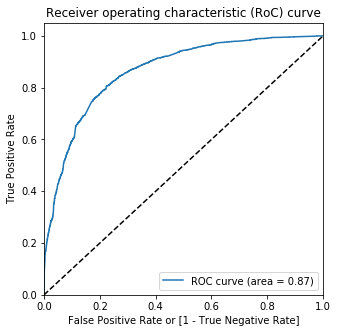

In [83]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

###### The ROC Curve should be a value close to 1. We are getting a good value of 0.87 indicating a good predictive model.

## Finding optimal cutoff

Above we had chosen an arbitrary cut-off value of 0.5.We need to determine the best cut-off value.

In [84]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.401616,4575,0,1,1,1,1,1,0,0,0,0,0
1,0,0.170269,5919,0,1,1,0,0,0,0,0,0,0,0
2,1,0.451188,8039,0,1,1,1,1,1,0,0,0,0,0
3,1,0.888630,2361,1,1,1,1,1,1,1,1,1,1,0
4,0,0.261427,8241,0,1,1,1,0,0,0,0,0,0,0


In [85]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379940  1.000000  0.000000
0.1   0.1  0.596127  0.974720  0.364144
0.2   0.2  0.707763  0.917530  0.579228
0.3   0.3  0.763187  0.858682  0.704672
0.4   0.4  0.791686  0.773726  0.802692
0.5   0.5  0.796410  0.664733  0.877095
0.6   0.6  0.776886  0.546622  0.917979
0.7   0.7  0.755944  0.451720  0.942357
0.8   0.8  0.713746  0.294654  0.970543
0.9   0.9  0.688710  0.194778  0.991366


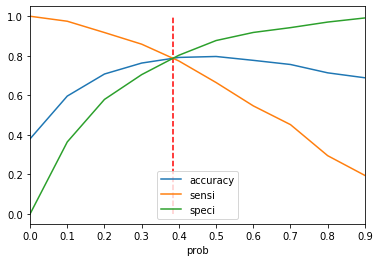

In [86]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.383, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [87]:
# Calculating conversion probability and adding a column for it.
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.401616,4575,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.170269,5919,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.451188,8039,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.888630,2361,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.261427,8241,0,1,1,1,0,0,0,0,0,0,0,0


In [88]:
# Calculating the score on basis of conversion probability and adding a column for it
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.401616,4575,0,1,1,1,1,1,0,0,0,0,0,1,40
1,0,0.170269,5919,0,1,1,0,0,0,0,0,0,0,0,0,17
2,1,0.451188,8039,0,1,1,1,1,1,0,0,0,0,0,1,45
3,1,0.888630,2361,1,1,1,1,1,1,1,1,1,1,0,1,89
4,0,0.261427,8241,0,1,1,1,0,0,0,0,0,0,0,0,26


In [89]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379940  1.000000  0.000000
0.1   0.1  0.596127  0.974720  0.364144
0.2   0.2  0.707763  0.917530  0.579228
0.3   0.3  0.763187  0.858682  0.704672
0.4   0.4  0.791686  0.773726  0.802692
0.5   0.5  0.796410  0.664733  0.877095
0.6   0.6  0.776886  0.546622  0.917979
0.7   0.7  0.755944  0.451720  0.942357
0.8   0.8  0.713746  0.294654  0.970543
0.9   0.9  0.688710  0.194778  0.991366


In [90]:
#confusion matrix for the train data set
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [91]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7885372382301999

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7894736842105263

In [93]:
# Let us calculate specificity
TN / float(TN+FP)

0.7879634332148299

##### So as we can see above the model seems to be performing well. The ROC curve has a value of 0.87, which is very good. We have the following values for the Train Data:

 - Accuracy : 78.85%
 - Sensitivity : 78.94%
 - Specificity : 78.80%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [94]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.21203656678517013


In [95]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6952554744525548


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8593187482691775


#### Precision and Recall

In [97]:
from sklearn.metrics import precision_score, recall_score

In [98]:
# Calculating the Precision score for train data
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.7681992337164751

In [99]:
# Calculating the Recall score for train data
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7894736842105263

### Making Predictions Using theTest Data

In [100]:
# Scaling the test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Not_Specified,Specialization_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Notable Activity_Modified,Last Notable Activity_Others,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Others,City_Thane & Outskirts
1540,0,-0.435374,0.805750,-0.150861,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3134,0,-1.160350,-0.891970,-1.276066,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0
2689,0,0.652090,-0.850029,1.536946,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0
4262,0,-1.160350,-0.891970,-1.276066,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6072,0,-1.160350,-0.891970,-1.276066,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0


In [101]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Specialization_Not_Specified,Lead Source_Google,Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Notable Activity_Modified,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1540,0,-0.435374,0.805750,-0.150861,1,1,0,0,0,0,0,1,0,1,0
3134,0,-1.160350,-0.891970,-1.276066,0,0,1,0,1,1,0,1,0,0,0
2689,0,0.652090,-0.850029,1.536946,0,1,0,1,0,0,0,0,0,1,0
4262,0,-1.160350,-0.891970,-1.276066,0,0,1,0,1,0,0,0,0,0,0
6072,0,-1.160350,-0.891970,-1.276066,0,0,1,0,1,1,0,1,0,0,0


In [102]:
# Adding constant to the test data
X_test_sm = sm.add_constant(X_test)

In [103]:
# Predicting y for X_test_sm
y_test_pred = res.predict(X_test_sm)

In [104]:
# Printing 10 rows
y_test_pred[:10]

1540    0.461494
3134    0.021670
2689    0.177461
4262    0.178896
6072    0.021670
292     0.065520
6178    0.750406
800     0.174815
7289    0.814543
149     0.518160
dtype: float64

In [105]:
# Converting y_test_pred into Dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [106]:
y_pred_1.head()

,0
1540,0.461494
3134,0.021670
2689,0.177461
4262,0.178896
6072,0.021670


In [107]:
# Creating the dataframe for y_test
y_test_df = pd.DataFrame(y_test)

In [108]:
# Making Prospect Id as the index
y_test_df['Prospect ID'] = y_test_df.index

In [109]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [110]:
# Concatinating both the dataframes
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [111]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,1540,0.461494
1,0,3134,0.021670
2,1,2689,0.177461
3,0,4262,0.178896
4,0,6072,0.021670


In [112]:
# Renaming the '0' as 'Converted_prob'
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [113]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,1540,0.461494
1,0,3134,0.021670
2,1,2689,0.177461
3,0,4262,0.178896
4,0,6072,0.021670


In [114]:
#Calculated the predicted values on the cutoff 0.38
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.38 else 0)

In [115]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,1,1540,0.461494,1
1,0,3134,0.021670,0
2,1,2689,0.177461,0
3,0,4262,0.178896,0
4,0,6072,0.021670,0


In [116]:
# Calculating the accuracy score
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7840616966580977

In [117]:
# Calculating the confusion matrix
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1347,  354],
       [ 234,  788]], dtype=int64)

In [118]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [119]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7710371819960861

In [120]:
# Let us calculate specificity
TN / float(TN+FP)

0.7918871252204586

In [121]:
# Calculating Recall Score
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7710371819960861

In [122]:
# Calculating the Precision Score
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.6900175131348512

#### After running the model on the Test Data these are the figures we obtain:

 - Accuracy : 78.41%
 - Sensitivity : 77.10%
 - Specificity : 79.18%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

## Generating the final Probability (Lead) Score

### Train Data

In [123]:
print('Conversion Score on Train data:',round(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100))

Conversion Score on Train data: 79.0


### Test Data

In [124]:
print('Conversion Score on Test data:',round(recall_score(y_pred_final.Converted, y_pred_final.final_predicted)*100))

Conversion Score on Test data: 77.0


In [125]:
#Lets plot features and respective coefficients from stats regression model
params_df = pd.DataFrame(columns=['coefficient'],data=res.params).reset_index()
params_df.rename(columns={'index':'feature'},inplace=True)
params_df.drop(index=0,inplace=True)
params_df.sort_values(by='coefficient',ascending=False)

,feature,coefficient
15,What is your current occupation_Working Profes...,3.704521
13,What is your current occupation_Others,1.356026
14,What is your current occupation_Unemployed,1.327971
3,Total Time Spent on Website,0.956821
2,TotalVisits,0.201936
9,Lead Source_Olark Chat,-0.280208
8,Lead Source_Google,-0.435234
4,Page Views Per Visit,-0.489501
5,A free copy of Mastering The Interview,-0.620223
12,Last Notable Activity_Modified,-0.626561


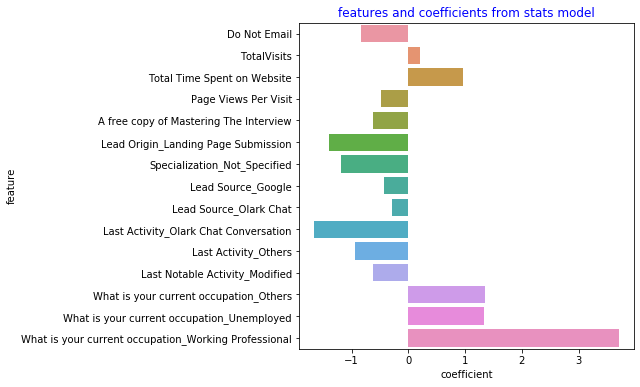

In [126]:
plt.figure(figsize=(6,6))
plt.title('features and coefficients from stats model',color='blue')
sns.barplot(y='feature',x='coefficient',data=params_df);

# Conclusion:

 - Based on the model build, we are getting the final metrics are mentioned below:
 
### Train Data Set : 
   - Accuray: 78.85%
   - Sensitivity: 78.94%
   - Specificity: 78.80%
   - Score: 79%
   
### Test Data Set : 
   - Accuray: 78.41%
   - Sensitivity: 77.10%
   - Specificity: 79.18%
   - Score: 77%
    
#### The top 3 variables which contribute most towards the probability of a lead getting converted are:
    
- What is your current occupation
- Total Time Spent on Website
- TotalVisits

#  Recommendations

 - Total time spent on the website and the total no. of visits is an important factor for lead conversion, the company should invest on making their website more attractive and engaging in order to enhance the conversion rate.
 - The company should focus on providing attractive offers to the currently unemployed people as these people have the maximum lead generation count. Also, working professional have the maximum conversion rate which means they are also beneficial for the company.
 - Almost 100% of the leads have responded negatively as whether they have seen the companies advertisement on various platform. The marketing team should focus more on this as current spending on advertisement is not helping in lead conversion.
 - The company should focus more on lead sourcing through Google and Olark Chat system.